<a href="https://colab.research.google.com/github/das-ankur/Amazon-Review-Sentiment-Analysis/blob/main/GANFromScratchV0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
from tqdm import trange
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Initialize Hyperparameters

In [ ]:
latent_dim = 100
image_size = 28 * 28
batch_size = 32
lr = 0.05
epochs = 10

## DataLoader

In [ ]:
# Initialize transforms for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [ ]:
# Load dataset
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [ ]:
# Initialize dataloader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

## Build Generator

In [ ]:
# Generator: Generates fake image
class Generator(nn.Module):
  def __init__(self, latent_dim, img_dim):
    super(Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(latent_dim, 128),
        nn.LeakyReLU(0.2),
        nn.Linear(128, 256),
        nn.LeakyReLU(0.2),
        nn.BatchNorm1d(256),
        nn.Linear(256, 512),
        nn.LeakyReLU(0.2),
        nn.BatchNorm1d(512),
        nn.Linear(512, img_dim),
        nn.Tanh()
    )

  def forward(self, x):
    return self.model(x)

## Build Discriminator

In [ ]:
# Discriminator: classifies image as real or fake
class Discriminator(nn.Module):
  def __init__(self, img_dim):
    super(Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(img_dim, 256),
        nn.LeakyReLU(0.2),
        nn.BatchNorm1d(256),
        nn.Linear(256, 64),
        nn.LeakyReLU(0.2),
        nn.BatchNorm1d(64),
        nn.Linear(64, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.model(x)

## Initialize Model, Loss and Optimizer

In [ ]:
# Initialize generator
generator = Generator(latent_dim, image_size)
generator

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): LeakyReLU(negative_slope=0.2)
    (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Linear(in_features=512, out_features=784, bias=True)
    (9): Tanh()
  )
)

In [ ]:
# Initialize discriminator
discriminator = Discriminator(image_size)
discriminator

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# Initialize loss function
loss = nn.BCELoss()

In [ ]:
# Initialize optimizers
gen_optimizer = optim.Adam(generator.parameters(), lr=lr)
disc_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

## Train Model

In [ ]:
# Train the model
for epoch in trange(epochs, desc=f'Epoch: '):
  for real_imgs, _ in dataloader:
    # Flatten real image
    real_imgs = real_imgs.view(-1, image_size)
    # Train discriminator
    z = torch.randn(batch_size, latent_dim)
    fake_imgs = generator(z)
    disc_real = discriminator(real_imgs)
    disc_fake = discriminator(fake_imgs)
    disc_loss = loss(disc_real, torch.ones_like(disc_real)) + loss(disc_fake, torch.zeros_like(disc_fake))
    disc_optimizer.zero_grad()
    disc_loss.backward()
    disc_optimizer.step()
    # Train generator
    z = torch.randn(batch_size, latent_dim)
    fake_imgs = generator(z)
    gen_loss = loss(discriminator(fake_imgs), torch.ones_like(disc_real))
    gen_optimizer.zero_grad()
    gen_loss.backward()
    gen_optimizer.step()
  print(f"Epoch [{epoch+1}/{epochs}] | Discriminator Loss: {disc_loss.item():.4f} | Generator Loss: {gen_loss.item():.4f}")

Epoch:  10%|█         | 1/10 [00:29<04:21, 29.05s/it]

Epoch [1/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch:  20%|██        | 2/10 [00:57<03:50, 28.77s/it]

Epoch [2/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch:  30%|███       | 3/10 [01:26<03:21, 28.76s/it]

Epoch [3/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch:  40%|████      | 4/10 [01:54<02:51, 28.65s/it]

Epoch [4/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch:  50%|█████     | 5/10 [02:23<02:23, 28.69s/it]

Epoch [5/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch:  60%|██████    | 6/10 [02:52<01:54, 28.68s/it]

Epoch [6/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch:  70%|███████   | 7/10 [03:21<01:26, 28.77s/it]

Epoch [7/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6932


Epoch:  80%|████████  | 8/10 [03:49<00:57, 28.74s/it]

Epoch [8/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch:  90%|█████████ | 9/10 [04:18<00:28, 28.74s/it]

Epoch [9/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


Epoch: 100%|██████████| 10/10 [04:47<00:00, 28.75s/it]

Epoch [10/10] | Discriminator Loss: 1.3863 | Generator Loss: 0.6931


## Generate Image

In [ ]:
# Set the generator to evaluation mode
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): LeakyReLU(negative_slope=0.2)
    (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Linear(in_features=512, out_features=784, bias=True)
    (9): Tanh()
  )
)

In [ ]:
# Generate image
z = torch.randn(1, latent_dim)
with torch.no_grad():
    fake_img = generator(z)
fake_img = fake_img.view(28, 28).cpu().numpy()

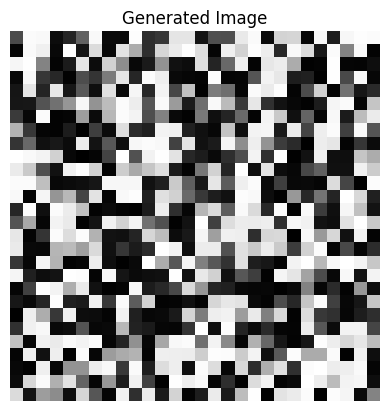

In [ ]:
# Plot the image
plt.imshow(fake_img, cmap='gray')
plt.title("Generated Image")
plt.axis('off')
plt.show()